# EDA [House Prices]

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('./data/train.csv', index_col='Id')
test = pd.read_csv('./data/test.csv', index_col='Id')

data = pd.concat([train, test])

## Numeric features

#### LotFrontage

In [3]:
data['LotFrontage'].isnull().sum()

486

In [4]:
train['LotFrontage'].sort_values(ascending=False).head(5), test['LotFrontage'].sort_values(ascending=False).head(5)

(Id
 1299    313.0
 935     313.0
 1128    182.0
 232     174.0
 198     174.0
 Name: LotFrontage, dtype: float64,
 Id
 2600    200.0
 2265    195.0
 2917    160.0
 2260    160.0
 2514    155.0
 Name: LotFrontage, dtype: float64)

In [5]:
front_outliers = (data['LotFrontage'] > 300)
data.drop(data.loc[front_outliers].index, inplace=True)

In [6]:
# fill NaNs
data['LotFrontage'].fillna(data['LotFrontage'].mean(), inplace=True)

#### LotArea

In [7]:
data['LotArea'].isnull().sum()

0

In [8]:
train['LotArea'].sort_values(ascending=False).head(5), test['LotArea'].sort_values(ascending=False).head(5)

(Id
 314    215245
 336    164660
 250    159000
 707    115149
 452     70761
 Name: LotArea, dtype: int64,
 Id
 2251    56600
 2264    51974
 2901    50102
 1948    47280
 2189    47007
 Name: LotArea, dtype: int64)

In [9]:
area_outliers = (data['LotArea'] > 100000)
data.drop(data.loc[area_outliers].index, inplace=True)

#### BsmtFinSF1

In [10]:
data['BsmtFinSF1'].isnull().sum()

1

In [11]:
# BsmtFinSF1
train['BsmtFinSF1'].sort_values(ascending=False).head(5), test['BsmtFinSF1'].sort_values(ascending=False).head(5)

(Id
 1299    5644
 524     2260
 899     2188
 1183    2096
 179     1904
 Name: BsmtFinSF1, dtype: int64,
 Id
 2550    4010.0
 1664    2288.0
 1975    2257.0
 1706    2158.0
 1678    2146.0
 Name: BsmtFinSF1, dtype: float64)

In [12]:
bsmt1_outliers = (data['BsmtFinSF1'] > 3000)
data['BsmtFinSF1_Outliers'] = np.zeros(data.shape[0])
data.loc[bsmt1_outliers, 'BsmtFinSF1_Outliers'] = 100

In [13]:
# fill NaNs
data['BsmtFinSF1'].fillna(data['BsmtFinSF1'].mean(), inplace=True)
data['BsmtFinSF2'].fillna(data['BsmtFinSF2'].mean(), inplace=True)

#### TotalBsmtSF

In [14]:
data['TotalBsmtSF'].isnull().sum()

1

In [15]:
# TotalBsmtSF
train['TotalBsmtSF'].sort_values(ascending=False).head(5), test['TotalBsmtSF'].sort_values(ascending=False).head(5)

(Id
 1299    6110
 333     3206
 497     3200
 524     3138
 441     3094
 Name: TotalBsmtSF, dtype: int64,
 Id
 2550    5095.0
 1480    2846.0
 2264    2660.0
 1664    2630.0
 2293    2552.0
 Name: TotalBsmtSF, dtype: float64)

In [16]:
bsmt_tot_outliers = (data['TotalBsmtSF'] > 4000)
data['TotalBsmtSF_Outliers'] = np.zeros(data.shape[0])
data.loc[bsmt_tot_outliers, 'TotalBsmtSF_Outliers'] = 100

In [17]:
# fill NaNs 
data['TotalBsmtSF'].fillna(data['TotalBsmtSF'].mean(), inplace=True)

#### 1stFlrSF

In [18]:
data['1stFlrSF'].isnull().sum()

0

In [19]:
# 1stFlrSF
train['1stFlrSF'].sort_values(ascending=False).head(5), test['1stFlrSF'].sort_values(ascending=False).head(5)

(Id
 1299    4692
 497     3228
 524     3138
 1025    2898
 1374    2633
 Name: 1stFlrSF, dtype: int64,
 Id
 2550    5095
 2189    3820
 2574    2726
 1480    2696
 1664    2674
 Name: 1stFlrSF, dtype: int64)

In [20]:
f_flr_outliers = (data['1stFlrSF'] > 4000)
data['1stFlrSF_Outliers'] = np.zeros(data.shape[0])
data.loc[f_flr_outliers, '1stFlrSF_Outliers'] = 100

#### GrLivArea

In [21]:
data['GrLivArea'].isnull().sum()

0

In [22]:
# GrLivArea
train['GrLivArea'].sort_values(ascending=False).head(5), test['GrLivArea'].sort_values(ascending=False).head(5)

(Id
 1299    5642
 524     4676
 1183    4476
 692     4316
 1170    3627
 Name: GrLivArea, dtype: int64,
 Id
 2550    5095
 2189    3820
 2823    3672
 2683    3500
 2629    3390
 Name: GrLivArea, dtype: int64)

In [23]:
main_outliers = (data['GrLivArea'] > 4500)
data['GrLivArea_Outliers'] = np.zeros(data.shape[0])
data.loc[main_outliers, 'GrLivArea_Outliers'] = 100

#### GarageYrBlt

In [24]:
data['GarageYrBlt'].isnull().sum()

159

In [25]:
# GarageYrBlt
train['GarageYrBlt'].sort_values(ascending=False).head(5), test['GarageYrBlt'].sort_values(ascending=False).head(5)

(Id
 379    2010.0
 988    2010.0
 820    2010.0
 582    2009.0
 158    2009.0
 Name: GarageYrBlt, dtype: float64,
 Id
 2593    2207.0
 1609    2010.0
 1503    2010.0
 1712    2009.0
 1662    2009.0
 Name: GarageYrBlt, dtype: float64)

In [26]:
garage_year_outlier = data['GarageYrBlt'] > 2010
data.loc[garage_year_outlier, 'GarageYrBlt'] = 2007

In [27]:
grg_yr_nans = data['GarageYrBlt'].isnull()

# add NaN indicators
data['GarageYrBltNaNs'] = np.zeros(data.shape[0])
data.loc[grg_yr_nans, 'GarageYrBltNaNs'] = 1

# fill NaNs
data['GarageYrBlt'].fillna(data['GarageYrBlt'].mean(), inplace=True)

#### WoodDeckSF

In [28]:
data['WoodDeckSF'].isnull().sum()

0

In [29]:
# WoodDeckSF
train['WoodDeckSF'].sort_values(ascending=False).head(5), test['WoodDeckSF'].sort_values(ascending=False).head(5)

(Id
 54      857
 1460    736
 1069    728
 336     670
 1314    668
 Name: WoodDeckSF, dtype: int64,
 Id
 2607    1424
 2683     870
 2608     690
 2823     684
 1530     657
 Name: WoodDeckSF, dtype: int64)

In [30]:
wood_deck_outliers = (data['WoodDeckSF'] > 1000)
data['WoodDeckSF_Outliers'] = np.zeros(data.shape[0])
data.loc[wood_deck_outliers, 'WoodDeckSF_Outliers'] = 100

#### EnclosedPorch

In [31]:
data['EnclosedPorch'].isnull().sum()

0

In [32]:
# EnclosedPorch
train['EnclosedPorch'].sort_values(ascending=False).head(5), test['EnclosedPorch'].sort_values(ascending=False).head(5)

(Id
 198     552
 748     386
 1198    330
 940     318
 1361    301
 Name: EnclosedPorch, dtype: int64,
 Id
 2504    1012
 2568     584
 1786     432
 2881     429
 1933     368
 Name: EnclosedPorch, dtype: int64)

In [33]:
enc_porch_outliers = (data['EnclosedPorch'] > 1000)
data['EnclosedPorch_Outliers'] = np.zeros(data.shape[0])
data.loc[enc_porch_outliers, 'EnclosedPorch_Outliers'] = 100

## Ordinal features


#### MSZoning

In [34]:
data['MSZoning'].isnull().sum(), data['MSZoning'].value_counts()

(4,
 RL         2259
 RM          460
 FV          139
 RH           26
 C (all)      25
 Name: MSZoning, dtype: int64)

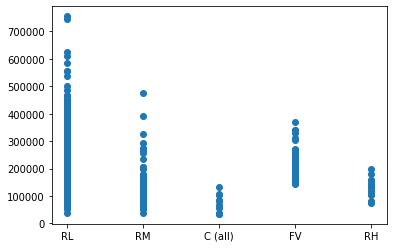

In [35]:
plt.scatter(train['MSZoning'].fillna(train['MSZoning'].mode()), train['SalePrice'])

In [36]:
# fill NaNs
data['MSZoning'].fillna(data['MSZoning'].mode()[0], inplace=True)

In [37]:
data['MSZoning'] = data['MSZoning'].map({
    'C (all)': 0,
    'RH': 1,
    'RM': 2,
    'FV': 3,
    'RL': 4,
})

In [38]:
data['MSZoning'].isnull().sum()

0

#### Street

In [39]:
data['Street'].isnull().sum()

0

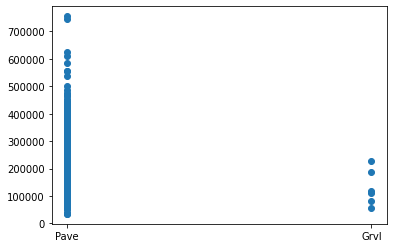

In [40]:
plt.scatter(train['Street'], train['SalePrice'])

In [41]:
data['Street'] = data['Street'].map({
    'Grvl': 0,
    'Pave': 1
})

#### Alley

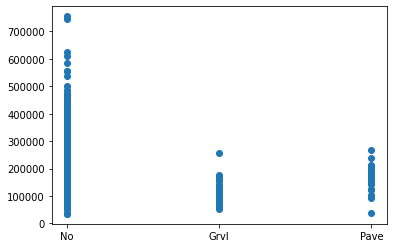

In [42]:
# Alley
plt.scatter(train['Alley'].fillna('No'), train['SalePrice'])

In [43]:
data['Alley'].fillna('No', inplace=True)

In [44]:
data['Alley'] = data['Alley'].map({
    'Grvl': 0,
    'Pave': 1,
    'No': 2
})

#### LotShape

In [45]:
data['LotShape'].isnull().sum()

0

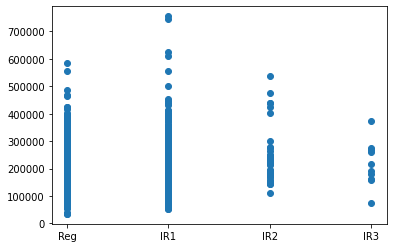

In [46]:
plt.scatter(train['LotShape'], train['SalePrice'])

In [47]:
data['LotShape'] = data['LotShape'].map({
    'IR3': 0,
    'IR2': 1,
    'Reg': 2,
    'IR1': 3
})

#### LandContour

In [48]:
data['LandContour'].isnull().sum()

0

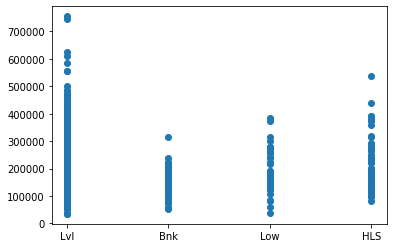

In [49]:
plt.scatter(train['LandContour'], train['SalePrice'])

In [50]:
data['LandContour'] = data['LandContour'].map({
    'Bnk': 0,
    'Low': 1,
    'HLS': 2,
    'Lvl': 3
})

#### Utilities

In [51]:
data['Utilities'].isnull().sum()

2

In [52]:
data['Utilities'].fillna(data['Utilities'].mode()[0], inplace=True)

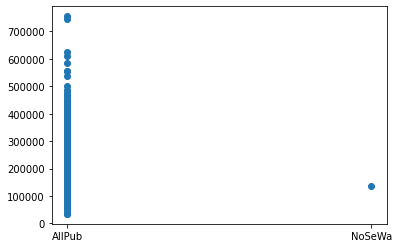

In [53]:
plt.scatter(train['Utilities'], train['SalePrice'])

In [54]:
data['Utilities'].unique()

array(['AllPub', 'NoSeWa'], dtype=object)

In [55]:
data['Utilities'] = data['Utilities'].fillna('NoSeWa').map({
    'AllPub': 1,
    'NoSeWa': 0
})

#### LotConfig

In [56]:
data['LotConfig'].isnull().sum()

0

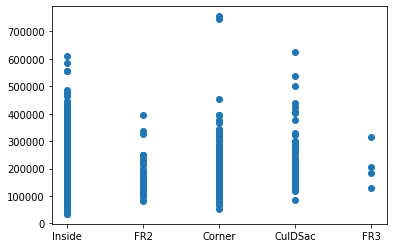

In [57]:
plt.scatter(train['LotConfig'], train['SalePrice'])

In [58]:
data['LotConfig'] = data['LotConfig'].map({
    'FR3': 0,
    'FR2': 1,
    'Corner': 2,
    'Inside': 3,
    'CulDSac': 4
})

#### LandSlope

In [59]:
data['LandSlope'].isnull().sum()

0

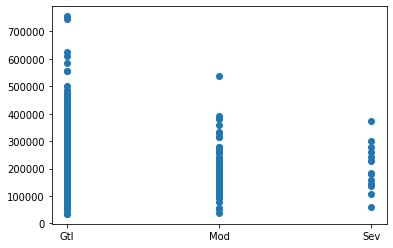

In [60]:
plt.scatter(train['LandSlope'], train['SalePrice'])

In [61]:
data['LandSlope'] = data['LandSlope'].map({
    'Sev': 0,
    'Mod': 1,
    'Gtl': 2
})

#### Neighborhood

In [62]:
data['Neighborhood'].isnull().sum()

0

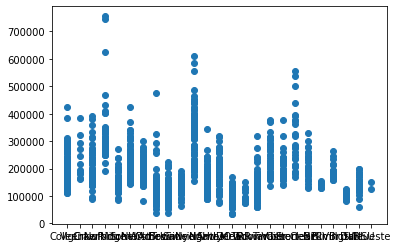

In [63]:
plt.scatter(train['Neighborhood'], train['SalePrice'])

In [64]:
train['Neighborhood'].unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [65]:
temp = train['Neighborhood'].map({
    'CollgCr': 15,
    'Veenker': 20,
    'Crawfor': 14,
    'NoRidge': 24,
    'Mitchel': 10,
    'Somerst': 18,
    'NWAmes': 17,
    'OldTown': 2,
    'BrkSide': 1,
    'Sawyer': 5,
    'NridgHt': 23,
    'NAmes': 11,
    'SawyerW': 13,
    'IDOTRR': 0,
    'MeadowV': 4,
    'Edwards': 9,
    'Timber': 21,
    'Gilbert': 19,
    'StoneBr': 22,
    'ClearCr': 16,
    'NPkVill': 8,
    'Blmngtn': 12,
    'BrDale': 3,
    'SWISU': 6,
    'Blueste': 7 
})

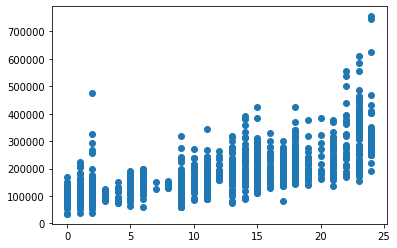

In [66]:
plt.scatter(temp, train['SalePrice'])

In [67]:
data['Neighborhood'] = data['Neighborhood'].map({
    'CollgCr': 15,
    'Veenker': 20,
    'Crawfor': 14,
    'NoRidge': 24,
    'Mitchel': 10,
    'Somerst': 18,
    'NWAmes': 17,
    'OldTown': 2,
    'BrkSide': 1,
    'Sawyer': 5,
    'NridgHt': 23,
    'NAmes': 11,
    'SawyerW': 13,
    'IDOTRR': 0,
    'MeadowV': 4,
    'Edwards': 9,
    'Timber': 21,
    'Gilbert': 19,
    'StoneBr': 22,
    'ClearCr': 16,
    'NPkVill': 8,
    'Blmngtn': 12,
    'BrDale': 3,
    'SWISU': 6,
    'Blueste': 7 
})

#### OverallQual

In [68]:
data['OverallQual'].isnull().sum()

0

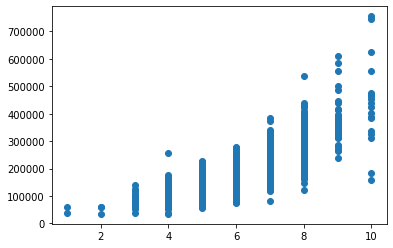

In [69]:
plt.scatter(train['OverallQual'], train['SalePrice'])

#### OverallCond

In [70]:
data['OverallCond'].isnull().sum()

0

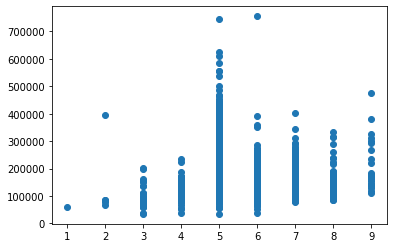

In [71]:
plt.scatter(train['OverallCond'], train['SalePrice'])

#### ExterQual

In [72]:
data['ExterQual'].isnull().sum()

0

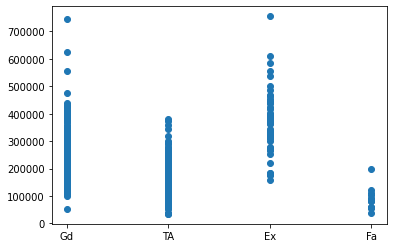

In [73]:
plt.scatter(train['ExterQual'], train['SalePrice'])

In [74]:
# 'Po' --> 0 ('Poor quality')
data['ExterQual'] = data['ExterQual'].map({
    'Fa': 1,
    'TA': 2,
    'Gd': 3,
    'Ex': 4
})

#### ExterCond

In [75]:
data['ExterCond'].isnull().sum()

0

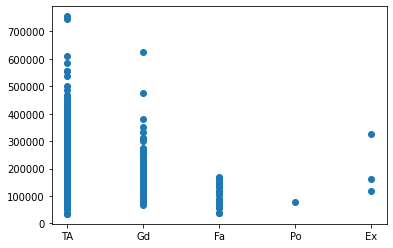

In [76]:
plt.scatter(train['ExterCond'], train['SalePrice'])

In [77]:
data['ExterCond'] = data['ExterCond'].map({
    'Po': 0,
    'Fa': 1,
    'TA': 2,
    'Gd': 3,
    'Ex': 4
})

#### BsmtQual

In [78]:
data['BsmtQual'].isnull().sum()

81

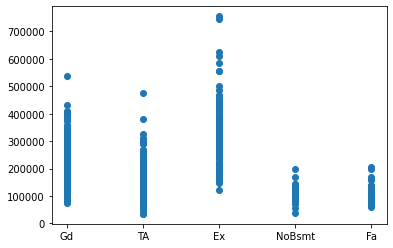

In [79]:
plt.scatter(train['BsmtQual'].fillna('NoBsmt'), train['SalePrice'])

In [80]:
data['BsmtQual'].fillna('NoBsmt', inplace=True)

In [81]:
data['BsmtQual'] = data['BsmtQual'].map({
    'NoBsmt': 0,
    'Fa': 1,
    'TA': 2,
    'Gd': 3,
    'Ex': 4
})

#### BsmtCond

In [82]:
data['BsmtCond'].isnull().sum()

82

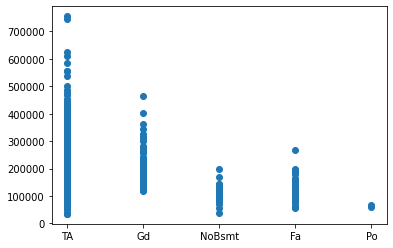

In [83]:
plt.scatter(train['BsmtCond'].fillna('NoBsmt'), train['SalePrice'])

In [84]:
data['BsmtCond'].fillna('NoBsmt', inplace=True)

In [85]:
data['BsmtCond'] = data['BsmtCond'].map({
    'Po': 0,
    'NoBsmt': 1,
    'Fa': 2,
    'TA': 3,
    'Gd': 4,
    'Ex': 5
})

#### BsmtExposure

In [86]:
data['BsmtExposure'].isnull().sum()

82

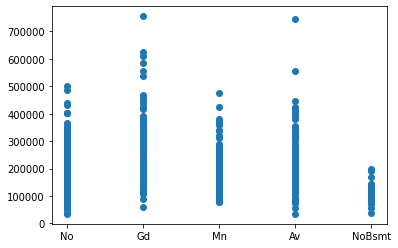

In [87]:
plt.scatter(train['BsmtExposure'].fillna('NoBsmt'), train['SalePrice'])

In [88]:
data['BsmtExposure'].fillna('NoBsmt', inplace=True)

In [89]:
data['BsmtExposure'] = data['BsmtExposure'].map({
    'NoBsmt': 0,
    'No': 1, 
    'Mn': 2,
    'Av': 3,
    'Gd': 4
})

#### BsmtFinType1

In [90]:
data['BsmtFinType1'].isnull().sum()

79

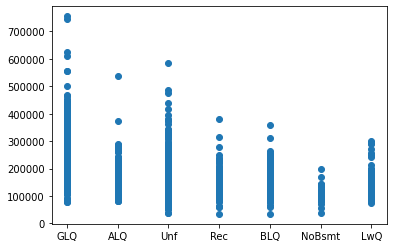

In [91]:
plt.scatter(train['BsmtFinType1'].fillna('NoBsmt'), train['SalePrice'])

In [92]:
data['BsmtFinType1'].fillna('NoBsmt', inplace=True)

In [93]:
data['BsmtFinType1'] = data['BsmtFinType1'].map({
    'NoBsmt': 0,
    'Unf': 1,
    'LwQ': 2,
    'Rec': 3,
    'BLQ': 4,
    'ALQ': 5,
    'GLQ': 6
})

#### BsmtFinType2

In [94]:
data['BsmtFinType2'].isnull().sum()

80

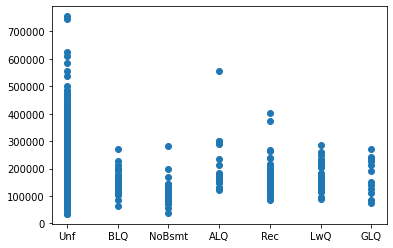

In [95]:
plt.scatter(train['BsmtFinType2'].fillna('NoBsmt'), train['SalePrice'])

In [96]:
data['BsmtFinType2'].fillna('NoBsmt', inplace=True)

In [97]:
data['BsmtFinType2'] = data['BsmtFinType2'].map({
    'NoBsmt': 0,
    'Unf': 1,
    'LwQ': 2,
    'Rec': 3,
    'BLQ': 4,
    'ALQ': 5,
    'GLQ': 6
})

#### Heating

In [98]:
data['Heating'].isnull().sum()

0

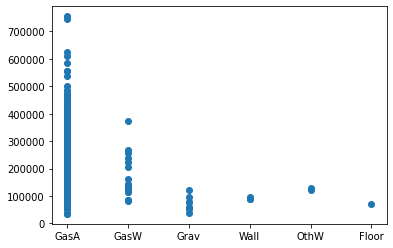

In [99]:
plt.scatter(train['Heating'], train['SalePrice'])

In [100]:
data['Heating'].value_counts()

GasA     2869
GasW       26
Grav        9
Wall        6
OthW        2
Floor       1
Name: Heating, dtype: int64

In [101]:
data['Heating'] = data['Heating'].map({
    'Floor': 0,
    'Wall': 1,
    'OthW': 2,
    'Grav': 3,
    'GasW': 10,
    'GasA': 20
})

#### HeatingQC

In [102]:
data['HeatingQC'].isnull().sum()

0

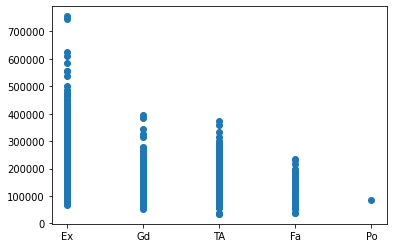

In [103]:
plt.scatter(train['HeatingQC'], train['SalePrice'])

In [104]:
data['HeatingQC'] = data['HeatingQC'].map({
    'Po': 0,
    'Fa': 1,
    'TA': 2,
    'Gd': 3,
    'Ex': 4
})

#### CentralAir

In [105]:
data['CentralAir'].isnull().sum()

0

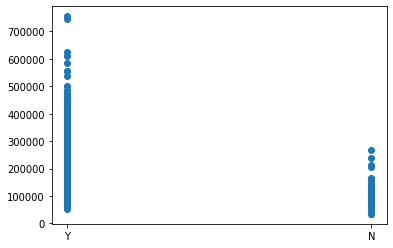

In [106]:
plt.scatter(train['CentralAir'], train['SalePrice'])

In [107]:
data['CentralAir'] = data['CentralAir'].map({
    'N': 0,
    'Y': 1
})

#### Electrical

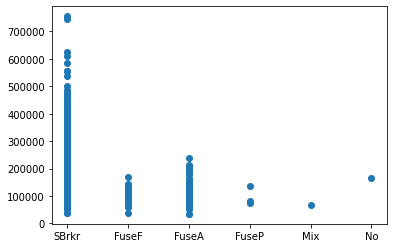

In [108]:
plt.scatter(train['Electrical'].fillna('No'), train['SalePrice'])

In [109]:
data['Electrical'].fillna('No', inplace=True)

In [110]:
data['Electrical'] = data['Electrical'].map({
    'Mix': 0,
    'FuseP': 1,
    'FuseF': 2,
    'FuseA': 3,
    'No': 4,
    'SBrkr': 5
})

#### FullBath

In [111]:
data['FullBath'].isnull().sum()

0

In [112]:
data['FullBath'].value_counts()

2    1524
1    1309
3      64
0      12
4       4
Name: FullBath, dtype: int64

In [113]:
data['FullBath'] = data['FullBath'].map({
    0: 0,
    1: 1,
    2: 2,
    3: 3,
    4: 3
})

#### BedroomAbvGr

In [114]:
data['BedroomAbvGr'].isnull().sum()

0

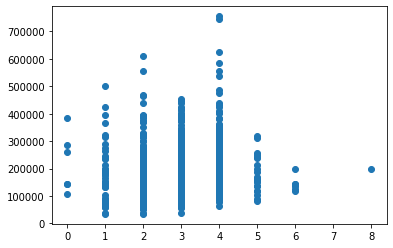

In [115]:
plt.scatter(train['BedroomAbvGr'], train['SalePrice'])

In [116]:
data['BedroomAbvGr'].replace({
    5: 4,
    6: 4,
    8: 4
}, inplace=True)

#### KitchenAbvGr

In [117]:
data['KitchenAbvGr'].isnull().sum()

0

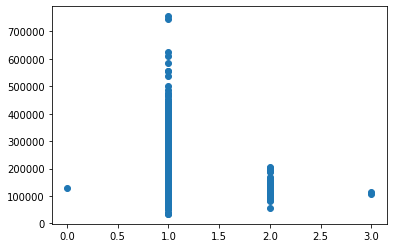

In [118]:
plt.scatter(train['KitchenAbvGr'], train['SalePrice'])

In [119]:
train['KitchenAbvGr'].value_counts(), test['KitchenAbvGr'].value_counts()

(1    1392
 2      65
 3       2
 0       1
 Name: KitchenAbvGr, dtype: int64,
 1    1393
 2      64
 0       2
 Name: KitchenAbvGr, dtype: int64)

In [120]:
data['KitchenAbvGr'].replace({
    1: 2,
    2: 1,
    3: 1
}, inplace=True)

#### KitchenQual

In [121]:
data['KitchenQual'].isnull().sum()

1

In [122]:
data['KitchenQual'].fillna(data['KitchenQual'].mode()[0], inplace=True)

In [123]:
data['KitchenQual'].value_counts()

TA    1491
Gd    1148
Ex     204
Fa      70
Name: KitchenQual, dtype: int64

In [124]:
data['KitchenQual'] = data['KitchenQual'].map({
    'Fa': 1,
    'TA': 2,
    'Gd': 3,
    'Ex': 4
})

#### FireplaceQu

In [125]:
data['FireplaceQu'].isnull().sum()

1420

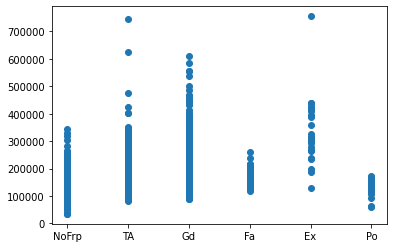

In [126]:
plt.scatter(train['FireplaceQu'].fillna('NoFrp'), train['SalePrice'])

In [127]:
data['FireplaceQu'].fillna('NoFrp', inplace=True)

In [128]:
data['FireplaceQu'] = data['FireplaceQu'].map({
    'NoFrp': 0,
    'Po': 1,
    'Fa': 2,
    'TA': 3,
    'Gd': 4,
    'Ex': 5
})

#### GarageFinish

In [129]:
data['GarageFinish'].isnull().sum()

159

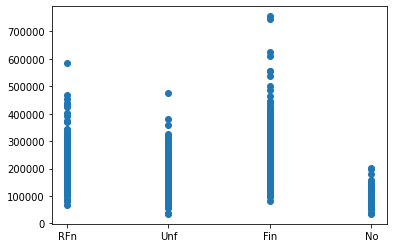

In [130]:
plt.scatter(train['GarageFinish'].fillna('No'), train['SalePrice'])

In [131]:
data['GarageFinish'].fillna('No', inplace=True)

In [132]:
data['GarageFinish'] = data['GarageFinish'].map({
    'No': 0,
    'Unf': 1,
    'RFn': 2,
    'Fin': 3
})

#### GarageCars

In [133]:
data['GarageCars'].isnull().sum()

1

In [134]:
data['GarageCars'].fillna(data['GarageCars'].mode()[0], inplace=True)

In [135]:
data['GarageCars'].value_counts()

2.0    1589
1.0     776
3.0     374
0.0     157
4.0      16
5.0       1
Name: GarageCars, dtype: int64

In [136]:
# outlier mask
cars_outlier = data['GarageCars'] == 5

In [137]:
# handle outlier
data['GarageCarsOutlier'] = np.zeros(data.shape[0])
data.loc[cars_outlier, 'GarageCarsOutlier'] = 1

In [138]:
data['GarageCars'] = data['GarageCars'].map({
    0: 0,
    1: 1,
    2: 2,
    3: 3,
    4: 3,
    5: 3
})

#### GarageQual

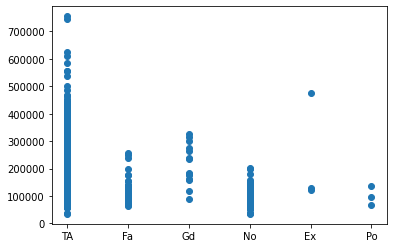

In [139]:
plt.scatter(train['GarageQual'].fillna('No'), train['SalePrice'])

In [140]:
data['GarageQual'].fillna('No', inplace=True)

In [141]:
data['GarageQual'] = data['GarageQual'].map({
    'Po': 0,
    'No': 1,
    'Fa': 2,
    'TA': 3,
    'Gd': 4,
    'Ex': 5
})

#### GarageCond

In [142]:
data['GarageCond'].isnull().sum()

159

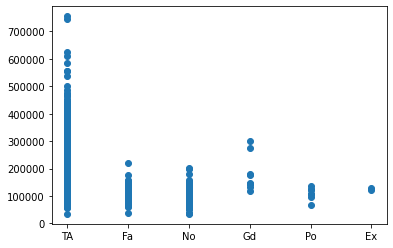

In [143]:
plt.scatter(train['GarageCond'].fillna('No'), train['SalePrice'])

In [144]:
data['GarageCond'].fillna('No', inplace=True)

In [145]:
data['GarageCond'] = data['GarageCond'].map({
    'Po': 0,
    'No': 1,
    'Fa': 2,
    'TA': 3,
    'Gd': 4,
    'Ex': 5
})

#### PavedDrive

In [146]:
data['PavedDrive'].isnull().sum()

0

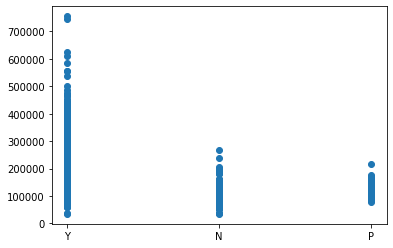

In [147]:
plt.scatter(train['PavedDrive'], train['SalePrice'])

In [148]:
data['PavedDrive'] = data['PavedDrive'].map({
    'N': 0,
    'P': 1,
    'Y': 2
})

#### MiscFeature

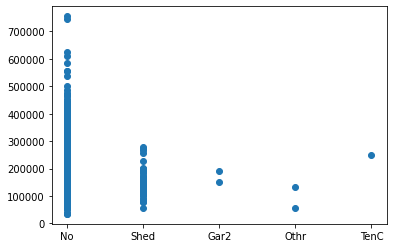

In [149]:
plt.scatter(train['MiscFeature'].fillna('No'), train['SalePrice'])

In [150]:
data['MiscFeature'].fillna('No', inplace=True)

In [151]:
data['MiscFeature'].unique()

array(['No', 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [152]:
data['MiscFeature'] = data['MiscFeature'].map({
    'Shed': 0,
    'Gar2': 0,
    'Othr': 0,
    'TenC': 0,
    'No': 1,
})

In [153]:
data['YrSold'].dtype

dtype('int64')

## Fill NaNs

In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2913 entries, 1 to 2919
Data columns (total 88 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MSSubClass              2913 non-null   int64  
 1   MSZoning                2913 non-null   int64  
 2   LotFrontage             2913 non-null   float64
 3   LotArea                 2913 non-null   int64  
 4   Street                  2913 non-null   int64  
 5   Alley                   2913 non-null   int64  
 6   LotShape                2913 non-null   int64  
 7   LandContour             2913 non-null   int64  
 8   Utilities               2913 non-null   int64  
 9   LotConfig               2913 non-null   int64  
 10  LandSlope               2913 non-null   int64  
 11  Neighborhood            2913 non-null   int64  
 12  Condition1              2913 non-null   object 
 13  Condition2              2913 non-null   object 
 14  BldgType                2913 non-null   

In [155]:
data.drop(['PoolQC', 'Fence'], axis=1, inplace=True)

#### Exterior

In [156]:
nullable_cols = data.columns[(data.isnull().sum() > 0)]
nullable_cols

Index(['Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtUnfSF',
       'BsmtFullBath', 'BsmtHalfBath', 'Functional', 'GarageType',
       'GarageArea', 'SaleType', 'SalePrice'],
      dtype='object')

In [157]:
ext1_nan = data['Exterior1st'].isnull()
ext2_nan = data['Exterior2nd'].isnull()

data.loc[ext1_nan].index, data.loc[ext2_nan].index

(Int64Index([2152], dtype='int64', name='Id'),
 Int64Index([2152], dtype='int64', name='Id'))

In [158]:
data.loc[ext1_nan, 'Exterior1st'] = 'No'
data.loc[ext1_nan, 'Exterior2nd'] = 'No'
data['Exterior1st'].unique()

array(['VinylSd', 'MetalSd', 'Wd Sdng', 'HdBoard', 'BrkFace', 'WdShing',
       'CemntBd', 'Plywood', 'AsbShng', 'Stucco', 'BrkComm', 'AsphShn',
       'Stone', 'ImStucc', 'CBlock', 'No'], dtype=object)

#### MasVnrType

In [159]:
mas_vnr_nan = data['MasVnrType'].isnull()
data.loc[mas_vnr_nan, ['MasVnrType', 'MasVnrArea']]

,MasVnrType,MasVnrArea
Id,,
235,NaN,NaN
530,NaN,NaN
651,NaN,NaN
937,NaN,NaN
974,NaN,NaN
978,NaN,NaN
1244,NaN,NaN
1279,NaN,NaN
1692,NaN,NaN


In [160]:
data.loc[mas_vnr_nan, 'MasVnrType'] = 'No'
data.loc[mas_vnr_nan, 'MasVnrArea'] = 0

#### Bsmt

In [161]:
['BsmtFinSF2', 'BsmtUnfSF', 'BsmtFullBath', 'BsmtHalfBath']

['BsmtFinSF2', 'BsmtUnfSF', 'BsmtFullBath', 'BsmtHalfBath']

In [162]:
bsmt2_nans = data['BsmtUnfSF'].isnull()
bsmt3_nans = data['BsmtFullBath'].isnull()
bsmt4_nans = data['BsmtHalfBath'].isnull()

In [163]:
data.loc[bsmt2_nans].index, data.loc[bsmt3_nans].index, data.loc[bsmt4_nans].index

(Int64Index([2121], dtype='int64', name='Id'),
 Int64Index([2121, 2189], dtype='int64', name='Id'),
 Int64Index([2121, 2189], dtype='int64', name='Id'))

In [164]:
data.loc[bsmt2_nans, 'BsmtUnfSF'] = 0
data.loc[bsmt3_nans, 'BsmtFullBath'] = 0
data.loc[bsmt4_nans, 'BsmtHalfBath'] = 0

#### Functional

In [165]:
data['Functional'].unique()

array(['Typ', 'Min1', 'Maj1', 'Min2', 'Mod', 'Maj2', 'Sev', nan],
      dtype=object)

In [166]:
data['Functional'].fillna('No', inplace=True)

#### GarageType

In [167]:
data['GarageType'].fillna('No', inplace=True)

#### GarageArea

In [168]:
data['GarageArea'].fillna(0, inplace=True)

#### SaleType

In [169]:
data['SaleType'].isnull().sum()

1

In [170]:
data['SaleType'].fillna(data['SaleType'].mode()[0], inplace=True)

## Feature Engineering

In [171]:
# age of the house
data['HouseAge'] = data['YrSold'] - data['YearBuilt']

# years since the last remodeling
data['ModelAge'] = data['YrSold'] - data['YearRemodAdd']

# drop previous columns
data.drop(['YearBuilt', 'YearRemodAdd'], axis=1, inplace=True)

In [172]:
nullable_cols = data.columns[(data.isnull().sum() > 0)]
nullable_cols

Index(['SalePrice'], dtype='object')

In [173]:
for col in nullable_cols:
    if col != 'SalePrice':
        if len(data[col].unique()) > 200:
            data[col].fillna(data[col].median(), inplace=True)
            data[col].replace({None: data[col].median()}, inplace=True)
        else:
            data[col].fillna(data[col].mode()[0], inplace=True)
            data[col].replace({None: data[col].mode()[0]}, inplace=True)
data.columns[(data.isnull().sum() > 0)]

Index(['SalePrice'], dtype='object')

## Categorical features

In [174]:
categ_features = []
for col in data.columns:
    if data[col].dtype == 'object':
        print(col)
        categ_features.append(col)

Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Foundation
Functional
GarageType
SaleType
SaleCondition


In [175]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in categ_features:
    data[col] = le.fit_transform(data[col])

In [176]:
data.drop_duplicates(inplace=True)

In [177]:
train_mask = data['SalePrice'].notnull()
test_mask = ~data['SalePrice'].notnull()

processed_train = data[train_mask]
processed_test = data[test_mask].drop('SalePrice', axis=1)

In [178]:
processed_train.to_csv('./processed/train.csv')
processed_test.to_csv('./processed/test.csv')

In [179]:
pd.read_csv('./processed/train.csv')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,BsmtFinSF1_Outliers,TotalBsmtSF_Outliers,1stFlrSF_Outliers,GrLivArea_Outliers,GarageYrBltNaNs,WoodDeckSF_Outliers,EnclosedPorch_Outliers,GarageCarsOutlier,HouseAge,ModelAge
0,1,60,4,65.0,8450,1,2,2,3,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,5
1,2,20,4,80.0,9600,1,2,2,3,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31,31
2,3,60,4,68.0,11250,1,2,3,3,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,6
3,4,70,4,60.0,9550,1,2,3,3,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,91,36
4,5,60,4,84.0,14260,1,2,3,3,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1449,1456,60,4,62.0,7917,1,2,2,3,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,7
1450,1457,20,4,85.0,13175,1,2,2,3,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32,22
1451,1458,70,4,66.0,9042,1,2,2,3,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69,4
1452,1459,20,4,68.0,9717,1,2,2,3,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60,14
